In [1]:
import pandas as pd
import numpy as np
import gzip
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# !cp '/mnt/data/public/insideairbnb/data.insideairbnb.com/singapore/sg/singapore/2019-03-18/data/listings.csv.gz' >> 

In [3]:
f_path = '/mnt/data/public/insideairbnb/data.insideairbnb.com/singapore/sg/singapore/2019-03-18/data/calendar.csv.gz'
with gzip.open(f_path, 'r') as f:
    df = pd.read_csv(f)

In [5]:
df.to_csv("singapore_airbnb.csv")

In [39]:
df.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
452646,16636855,2019-05-03,t,$29.00,$29.00,25.0,180.0
1263006,24781937,2019-07-02,f,$100.00,$100.00,3.0,30.0
644385,18934811,2019-08-25,t,$200.00,$200.00,7.0,1125.0
1536350,27915805,2019-05-22,t,$188.00,$188.00,10.0,888.0
1461615,27140686,2019-08-20,f,$70.00,$70.00,10.0,1125.0


In [7]:
f_path = '/mnt/data/public/insideairbnb/data.insideairbnb.com/singapore/sg/singapore/2019-03-18/data/listings.csv.gz'
with gzip.open(f_path, 'r') as f:
    df_listings = pd.read_csv(f)

In [9]:
df_listings.to_csv('singapore_listings_20190318.csv')

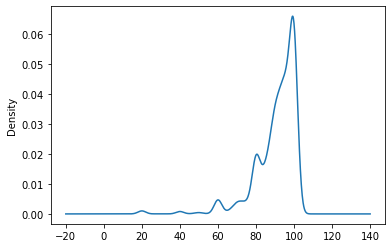

In [8]:
df_listings['review_scores_rating'].plot(kind='density')

In [26]:
f_path = '/mnt/data/public/insideairbnb/data.insideairbnb.com/singapore/sg/singapore/2019-03-18/data/reviews.csv.gz'
with gzip.open(f_path, 'r') as f:
    df_reviews = pd.read_csv(f)

In [27]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


In [28]:
df_listings.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [9]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190318042744,2019-03-18,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.02
1,50646,https://www.airbnb.com/rooms/50646,20190318042744,2019-03-18,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,...,f,f,moderate,f,t,1,0,1,0,0.30
2,56334,https://www.airbnb.com/rooms/56334,20190318042744,2019-03-18,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,none,NaN,...,f,f,flexible,t,t,2,0,2,0,0.21
3,71609,https://www.airbnb.com/rooms/71609,20190318042744,2019-03-18,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,Landed Homestay Room for Rental. Between Simei...,For 3 (Website hidden by Airbnb) room 1&2 and ...,none,NaN,...,t,f,moderate,f,t,9,0,9,0,0.14
4,71896,https://www.airbnb.com/rooms/71896,20190318042744,2019-03-18,B&B Room 1 near Airport & EXPO,NaN,Vocational Stay Deluxe Bedroom in Singapore.(N...,Vocational Stay Deluxe Bedroom in Singapore.(N...,none,NaN,...,t,f,moderate,f,t,9,0,9,0,0.22


listings - Detailed listings data showing 96 attributes for each of the listings. Some of the attributes used in the analysis are price(continuous), longitude (continuous), latitude (continuous), listing_type (categorical), is_superhost (categorical), neighbourhood (categorical), ratings (continuous) among others.
reviews - Detailed reviews given by the guests with 6 attributes. Key attributes include date (datetime), listing_id (discrete), reviewer_id (discrete) and comment (textual).
calendar - Provides details about booking for the next year by listing. Four attributes in total including listing_id (discrete), date(datetime), available (categorical) and price (continuous).
A quick glance at the data shows that there are:
50,968 unique listing in NYC in total. The first rental in NYC was up in April, 2008 in Harlem, Manhattan.
Over 1 million reviews have been written by guests since then.
The price for a listing ranges from $10 per night to $10,000(!) per night. Listing with $10,000 price tag are in Greenpoint, Brooklyn; Astoria, Queens and Upper West Side, Manhattan.

In [10]:
dict(zip(df_listings.iloc[15].T.index.to_list(), df_listings.iloc[15].to_list()))

{'id': 301247,
 'listing_url': 'https://www.airbnb.com/rooms/301247',
 'scrape_id': 20190318042744,
 'last_scraped': '2019-03-18',
 'name': 'Nice room with private bath beside train station',
 'summary': 'Located just beside the PayaLebar train station which is equidistant from both Changi International Airport, as well downtown area with only 10-15 mins train ride. Private bathroom with no additional charges/fees for cleaning or using washing machine. Please see the room pictures before booking.',
 'space': 'Nice cozy room with a study table, bed, closet, aircon and private toilet in a spacious condo with swimming pool and gym facilities. Condo exit is connected to Paya Lebar MRT station. This is a room with no-frills features as follows:  - Single-bed (mattress without frame),  - Private bathroom  - Air-con,  - Table,  - Chair,  - Closet / Hangers,  - Bed sheet and Blanket  - 24-hr Free Accessibility (no night curfew). We provide you these during your stay:  - Free WiFi  - Iron and i

https://www.linkedin.com/pulse/segmenting-clustering-airbnb-listings-zurich-georgios-chatzis
https://towardsdatascience.com/airbnb-rental-listings-dataset-mining-f972ed08ddec
http://www.columbia.edu/~sg3637/airbnb_final_analysis.html
https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features


In [11]:
df_listings.groupby('host_id').size() [df_listings.groupby('host_id').size() > 2]

host_id
59498         3
228867       10
229339       25
367042        9
646629       16
             ..
243216499     5
244037446     4
245738052     4
248196938    14
248361661    79
Length: 468, dtype: int64

In [12]:
data = df_listings[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
            'bed_type', 'amenities', 'price', 'monthly_price', 'minimum_nights', 
            'maximum_nights', 'is_business_travel_ready', 'instant_bookable',
            'neighborhood_overview']]

features: property_type
room_type
accommodates
bathrooms
bedrooms
beds
ed_type
amenities
price
minimum_nights
maximum_nights
is_business_travel_ready
instant_bookable
neighborhood_overview
experiences_offered

In [13]:
data['property_type'].unique()

array(['Apartment', 'Villa', 'House', 'Townhouse', 'Other', 'Condominium',
       'Bed and breakfast', 'Loft', 'Serviced apartment', 'Bungalow',
       'Guest suite', 'Aparthotel', 'Hostel', 'Chalet', 'Hotel',
       'Guesthouse', 'Boat', 'Boutique hotel', 'Cabin', 'Tent', 'Cottage',
       'Campsite', 'Farm stay', 'Camper/RV', 'Treehouse', 'Tiny house'],
      dtype=object)

In [14]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
data['accommodates'].unique()

array([ 1,  2,  6,  3,  8,  5,  4, 10,  9, 14, 16,  7, 12, 15, 13, 11])

In [22]:
data['bathrooms'].unique()

array([ 1. ,  0.5,  0. ,  2. ,  4. ,  3.5,  3. ,  1.5,  2.5,  8. ,  6. ,
        4.5,  5. ,  7. ,  8.5,  5.5,  7.5,  9. , 20. ,  6.5, 10. , 21. ])

In [23]:
data['bathrooms'].replace(np.nan, 0, inplace=True)

In [24]:
data['bedrooms'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  8.,  7., 10.])

In [25]:
data['bedrooms'].replace(np.nan, 0, inplace=True)

In [26]:
data['beds'].unique()

array([ 1.,  3.,  2.,  7.,  4.,  0.,  5., 12.,  6.,  8., 10., 16., 15.,
        9., 13., 14., 18., 30., 36.])

In [27]:
data['beds'].replace(np.nan, 0, inplace=True)

In [28]:
data['bed_type'].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [29]:
stripped = [string.strip('{').strip('}').split(',') for string in list(data['amenities'].values)]
stripped_1 = []
for group in stripped:
        stripped_1.append([word.strip('''"''').strip("'") for word in group])

In [32]:
data['amenities'].replace(stripped_1, inplace=True)

In [33]:
data['amenities'].sample(5)

1651    {TV,Wifi,Kitchen,"Free parking on premises",Wa...
5644    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
6310    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Smok...
7364    {Wifi,"Air conditioning",Kitchen,"Paid parking...
190     {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

In [34]:
def to_bow(docs):
    my_list = [dict(Counter(doc.lower().split())) for doc in docs]
    df = pd.DataFrame(my_list).fillna(0)
    return df.reindex(sorted(df.columns), axis=1)

In [35]:
bow_list = []
for group in stripped_1:
    bow_list.append(to_bow(group).sum())

In [36]:
cat = pd.concat(bow_list, axis=1)

In [37]:
cat.T.fillna(0, inplace=True)

In [38]:
len(cat)

197

In [39]:
catT = cat.T

In [40]:
# len(data)
catT.columns = ['amenities_'+name for name in catT.columns.to_list()]
# catT

In [41]:
data_1 = pd.concat([data, catT], axis=1)

In [42]:
def convert(x):
    try:
        return int(x.strip('$').split('.')[0].split(',')[0])*1000+int(x.strip('$').split('.')[0].split(',')[1])
    except IndexError:
        return int(x.strip('$').split('.')[0])

data_1['price'] = data_1['price'].apply(lambda x: convert(x))

In [43]:
data_1.drop(columns=['monthly_price'], inplace=True)

In [44]:
# data_1['monthly_price'].isna().sum()

In [45]:
# data_1['monthly_price'][data_1['monthly_price'].isna()].index
# for label in data_1['monthly_price'][data_1['monthly_price'].isna()].index:
#     data_1.loc[label]['monthly_price'] = data_1.loc[label]['price']*30

In [46]:
data_1['minimum_nights'].unique()

array([ 180,   90,    6,    1,    7,   30,   15,    2,  120,    3,    4,
          5,   18,  365,   20,   60,    9,   21,  108,   14,  183,  100,
         10,   13,   28,  360,   91,   12,   25,   84,   29,    8,  150,
         80,   50,  200,  300,  190,   45,   92,  500,   17,   93,  188,
         26,   88,  185,  240,   85,   75,  210,   59,   31,   89, 1000,
        186,   48,  181,   40,   22,   24,   11,  700,  179,   96,   55,
        168,   65,   35,   32])

In [47]:
data_1['maximum_nights'].unique()

array([   360,    730,     14,   1125,    365,   1000,    180,    100,
          720,     90,     11,    330,   1123,   1124,     30,      1,
           60,    270,      7,     45,    800,     70,    999,     21,
           40,    150,    200,    160,  10000,   9001,     28,    380,
         1095,     10,    233,     20,   1120,    900,     31,     15,
           12,    366,    400,     50,    250,     29,      5,    120,
            3,      2,    500,     35,   2000,  99999,      6,   1100,
           80,    300,      4,     53,    265,     32,   1111,    488,
          700,     25,     18,    356,    210,    182,    546,     65,
           22, 100000,    600,     19,      9,     13,     16,     86,
          111,      8,    364,    240,     58,     99,   1059,    118,
          181,    243,    650,   9999,    888,     62,     36,     95,
           69,    397,    185,    555,   1080,    540,    320,    112,
          750,     54,     23,     91,    130,     39,    178,    183,
      

In [48]:
data_1['is_business_travel_ready'].unique()

array(['f'], dtype=object)

In [49]:
data_1[data_1['is_business_travel_ready'] == 't']

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,...,amenities_bars,amenities_fixed,amenities_grab,amenities_gates,amenities_stair,amenities_mobile,amenities_ski-in/ski-out,amenities_electric,amenities_profiling,amenities_kitchenette


In [50]:
data_1.drop(columns='is_business_travel_ready', inplace=True)

In [51]:
data_1['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [52]:
data_1['instant_bookable'] = data_1['instant_bookable'].map({'f': 0, 't':1})

In [53]:
data_1['neighborhood_overview'].isna().sum()

3234

In [54]:
data_1['neighborhood_overview'].replace(np.nan, '', inplace=True)

In [55]:
stripped_2 = data_1['neighborhood_overview'].to_list()


In [245]:
text_list = [text.split(' ') for text in stripped_2]
group_list = []
for group in text_list:
    group_list.append([word.strip().strip("'").strip('''"''').strip('.').strip('(').strip(')').strip('!') for word in group])

In [247]:
bow_list_2 = []
for group in group_list:
    bow_list_2.append(to_bow(group).sum())

In [248]:
cat_2 = pd.concat(bow_list_2, axis=1)

In [250]:
cat2T = cat_2.T
cat2T.columns = ['neighborhood_overview_'+name for name in cat2T.columns.to_list()]

In [251]:
data_2 = pd.concat([data_1, cat2T], axis=1)

In [252]:
data_2.drop(columns=['neighborhood_overview', 'amenities'], inplace=True)

In [253]:
data_2.fillna(0, inplace=True)

In [79]:
X = pd.get_dummies(data_2)

In [80]:
X.isna().sum().sum()

0

In [81]:
X_scaled = StandardScaler().fit_transform(X)

In [113]:
inertia_list = []
for n in range(1, 10):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

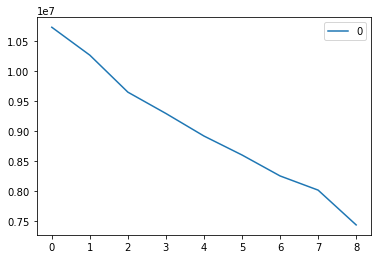

In [114]:
pd.DataFrame(inertia_list).plot(kind='line')

In [110]:
from sklearn.cluster import AgglomerativeClustering

In [115]:
inertia_list_2 = []
for n in range(10, 20):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list_2.append(km.inertia_)

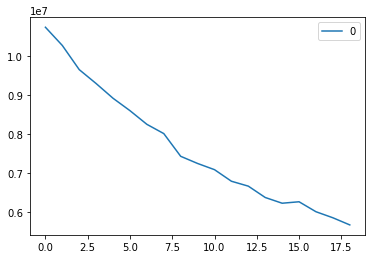

In [116]:
pd.DataFrame(inertia_list + inertia_list_2).plot(kind='line')

In [118]:
inertia_list_3 = []
for n in range(20, 30):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list_3.append(km.inertia_)

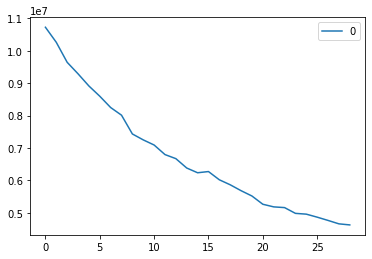

In [119]:
pd.DataFrame(inertia_list + inertia_list_2 + inertia_list_3).plot(kind='line')

In [120]:
inertia_list_4 = []
for n in range(30, 40):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list_4.append(km.inertia_)

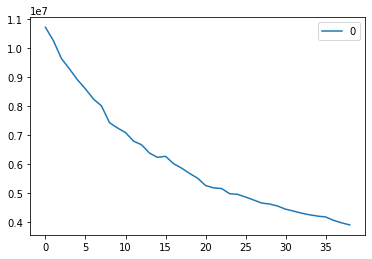

In [121]:
pd.DataFrame(inertia_list + inertia_list_2 + inertia_list_3 + inertia_list_4).plot(kind='line')

In [122]:
from sklearn.decomposition import PCA, TruncatedSVD
X_new = (TruncatedSVD(n_components=2, random_state=1337)
                .fit_transform(X_scaled))

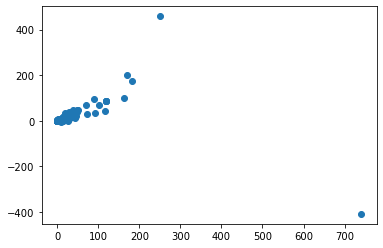

In [127]:
plt.scatter(X_new[:, 0], X_new[:, 1])

In [129]:
y_pred = km.predict(X_scaled)

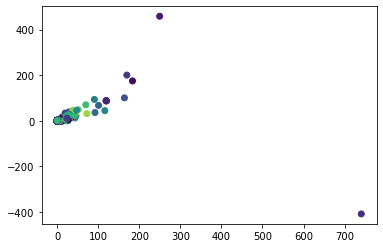

In [130]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred)

In [136]:
X_new[:, 0][X_new[:, 0] >400]

array([740.69670894])

In [138]:
np.where(X_new[:, 0] > 500)

(array([5239]),)

In [140]:
X_new[5239]

array([ 740.69670894, -408.64753519])

In [145]:
X = pd.get_dummies(data_2.drop(index=5239))

In [146]:
X_scaled = StandardScaler().fit_transform(X)

In [147]:
X_new = (TruncatedSVD(n_components=2, random_state=1337)
                .fit_transform(X_scaled))

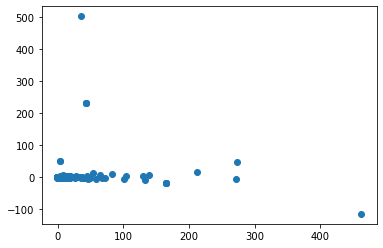

In [148]:
plt.scatter(X_new[:,0], X_new[:,1])

In [150]:
# np.where(X_new[:,1] > 100)

In [151]:
from sklearn.ensemble import IsolationForest

In [153]:
# data_2

In [157]:
isolate = IsolationForest(n_jobs=-1)
isolate.fit(pd.get_dummies(data_2))


array([1, 1, 1, ..., 1, 1, 1])

In [158]:
anomaly = isolate.predict(pd.get_dummies(data_2))
scores = isolate.decision_function(pd.get_dummies(data_2))
data_2['anomaly'] = anomaly
data_3 = data_2[data_2['anomaly'] == 1].copy()
data_3.drop(columns='anomaly', inplace=True)

In [161]:
data_2.groupby('anomaly').size()

anomaly
-1     272
 1    7703
dtype: int64

In [165]:
X = pd.get_dummies(data_3)

In [166]:
X_scaled = StandardScaler().fit_transform(X)

In [167]:
X_new = (TruncatedSVD(n_components=2, random_state=1337)
                .fit_transform(X_scaled))

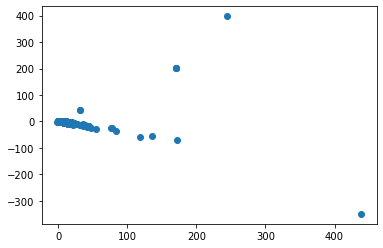

In [168]:
plt.scatter(X_new[:,0], X_new[:,1])

In [169]:
inertia_list_5 = []
for n in range(1, 40):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list_5.append(km.inertia_)

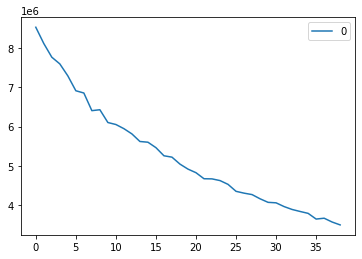

In [170]:
pd.DataFrame(inertia_list_5).plot(kind='line')

In [174]:
data_2.isna().sum().sum()

0

In [254]:
df = pd.get_dummies(data_2).drop(columns=(pd.get_dummies(data_2).sum()[pd.get_dummies(data_2).sum() <= 10]).index.to_list())

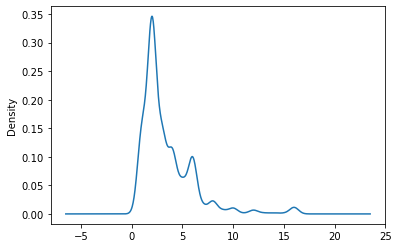

In [255]:
df['accommodates'].plot(kind='density')

In [256]:
df['log_accommodates'] = (df['accommodates']+1).transform(np.log)

In [257]:
(df['log_accommodates'] <0).sum()

0

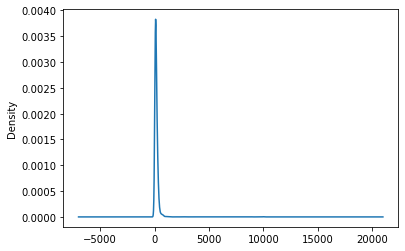

In [258]:
df['price'].plot(kind='density')

In [259]:
df['log_price'] = (df['price']+1).transform(np.log)

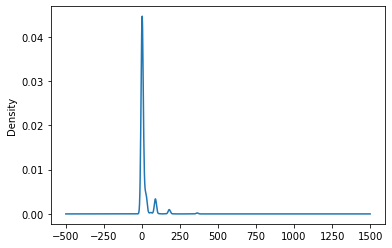

In [260]:
df['minimum_nights'].plot(kind='density')

In [261]:
df['log_minimum_nights'] = (df['minimum_nights']+1).transform(np.log)

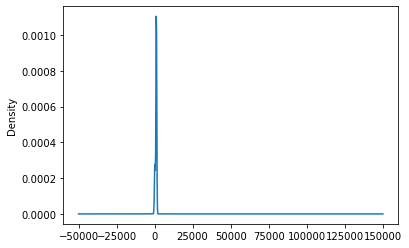

In [262]:
df['maximum_nights'].plot(kind='density')

In [263]:
df['log_maximum_nights'] = (df['maximum_nights']+1).transform(np.log)

In [264]:
df_1 = df.drop(columns=['accommodates', 'price', 'minimum_nights', 'maximum_nights'])

In [267]:
df_1.head()

,bathrooms,bedrooms,beds,instant_bookable,amenities_air,amenities_cable,amenities_cat(s),amenities_conditioning,amenities_elevator,amenities_internet,...,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,log_accommodates,log_price,log_minimum_nights,log_maximum_nights
0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0.693147,4.406719,5.198497,5.888878
1,1.0,1.0,1.0,0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,1.098612,4.394449,4.510860,6.594413
2,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,1,0.693147,4.234107,1.945910,2.708050
3,1.0,2.0,3.0,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,1.945910,5.303305,0.693147,7.026427
4,0.5,1.0,1.0,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,1.386294,4.532599,0.693147,7.026427


In [266]:
isolate = IsolationForest(n_jobs=-1)
isolate.fit(df_1)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=None, verbose=0, warm_start=False)

In [268]:
anomaly = isolate.predict(df_1)
scores = isolate.decision_function(df_1)
df_1['anomaly'] = anomaly
df_1_1 = df_1[df_1['anomaly'] == 1].copy()
df_1_1.drop(columns='anomaly', inplace=True)

In [269]:
len(anomaly)/len(df_1)

1.0

In [271]:
len(anomaly)

7975

In [275]:
sum(anomaly == -1)

0

In [277]:
len(df_1_1)

7975

In [278]:
X_scaled = StandardScaler().fit_transform(df_1_1)

In [279]:
X_new = (TruncatedSVD(n_components=2, random_state=1337)
                .fit_transform(X_scaled))

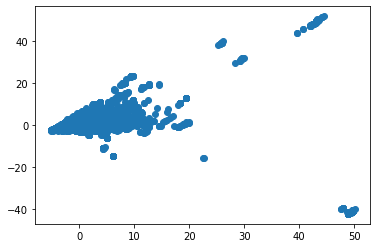

In [281]:
plt.scatter(X_new[:,0], X_new[:,1])

In [282]:
X_new_pca = PCA(n_components=2, random_state=1337).fit_transform(X_scaled)

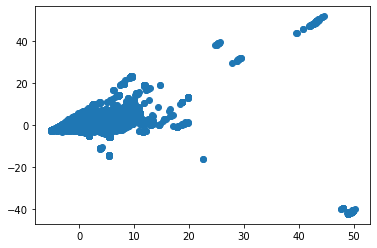

In [283]:
plt.scatter(X_new_pca[:,0], X_new_pca[:,1])

In [300]:
def gap_statistic(X, y, centroids, dist, b, clusterer, random_state=None):
    """Compute the gap statistic
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Number of pairs to sample
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
    b : int
        Number of realizations for the reference distribution
    clusterer : KMeans
        Clusterer object that will be used for clustering the reference 
        realizations
    random_state : int, default=None
        Determines random number generation for realizations
        
    Returns
    -------
    gs : float
        Gap statistic
    gs_std : float
        Standard deviation of gap statistic
    """
    rng = np.random.default_rng(random_state)
    W_ki = []
    for i in range(b):
        distribution = rng.uniform(X.min(0), X.max(0), X.shape)
        realizations = clusterer.fit_predict(distribution)
        W_ki.append(np.log(pooled_within_ssd(distribution, realizations, 
                                             clusterer.cluster_centers_, 
                                             dist)))
    E_logWk = np.mean(W_ki)
    Gap = E_logWk - np.log(pooled_within_ssd(X, y, centroids, dist))
    return Gap, np.std(W_ki)

In [305]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean, cityblock

inertia_list_6 = []
CH = []
SC= []
GS = []
for n in range(2, 6):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list_6.append(km.inertia_)
    CH.append(calinski_harabasz_score(X_scaled, km.predict(X_scaled)))
    SC.append(silhouette_score(X_scaled, km.predict(X_scaled)))
#     GS.append(gap_statistic(X_scaled, km.predict(X_scaled), km.cluster_centers_, euclidean, n, KMeans))

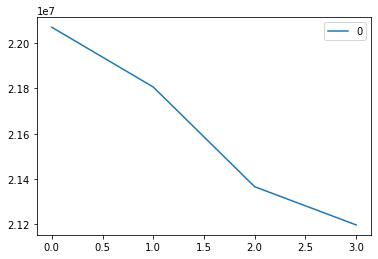

In [308]:
pd.DataFrame(inertia_list_6).plot(kind='line')

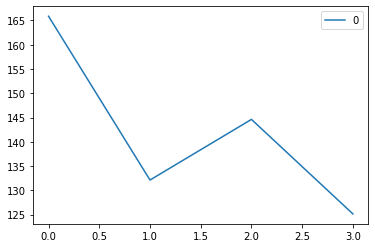

In [309]:
pd.DataFrame(CH).plot(kind='line')

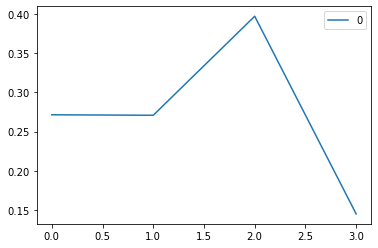

In [310]:
pd.DataFrame(SC).plot(kind='line')

In [313]:
inertia_list_7 = []
CH_7 = []
SC_7= []
# GS = []
for n in range(6, 10):
    km = KMeans(n_clusters=n, max_iter=300, tol=1e-4, n_jobs=-1)
    km.fit(X_scaled)
    inertia_list_7.append(km.inertia_)
    CH_7.append(calinski_harabasz_score(X_scaled, km.predict(X_scaled)))
    SC_7.append(silhouette_score(X_scaled, km.predict(X_scaled)))

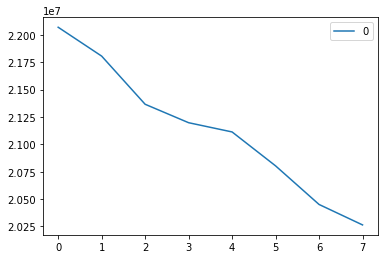

In [316]:
pd.DataFrame(inertia_list_6+inertia_list_7).plot(kind='line')

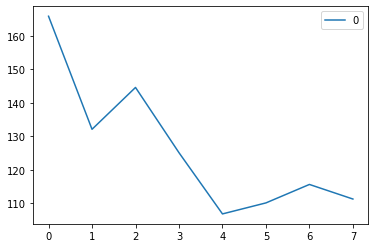

In [318]:
pd.DataFrame(CH+CH_7).plot(kind='line')

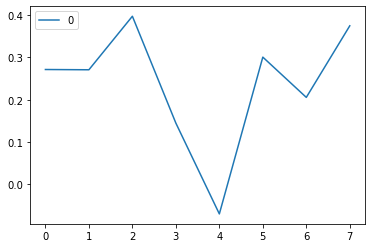

In [319]:
pd.DataFrame(SC+SC_7).plot(kind='line')

In [295]:
km_4 = KMeans(n_clusters=3, max_iter=300, tol=1e-4, n_jobs=-1)
y_pred_km4 = km_4.fit_predict(X_scaled)

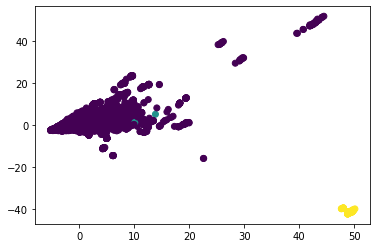

In [296]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_pred_km4)

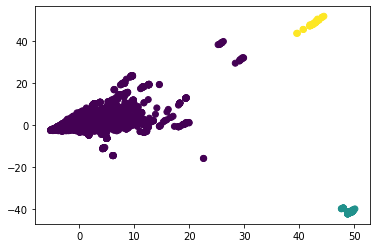

In [339]:
agc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred_agc = agc.fit_predict(X_scaled)
plt.scatter(X_new[:,0], X_new[:,1], c=y_pred_agc)

In [340]:
agc = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='cosine')
y_pred_agc = agc.fit_predict(X_scaled)
# plt.scatter(X_new[:,0], X_new[:,1], y_pred_agc)

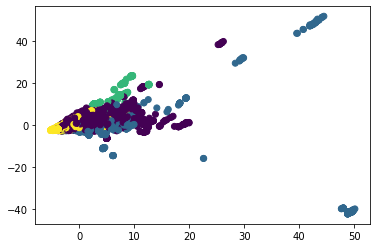

In [341]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_pred_agc)

In [337]:
agc = AgglomerativeClustering(n_clusters=3, linkage='single', affinity='cosine')
y_pred_agc = agc.fit_predict(X_scaled)

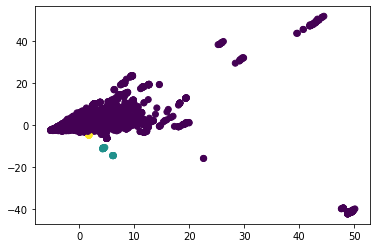

In [338]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_pred_agc)

In [324]:
from sklearn.cluster import DBSCAN

In [325]:
db = DBSCAN(eps=0.5, min_samples=5, metric='cosine', algorithm='auto', n_jobs=-1)
y_pred_db = db.fit_predict(X_scaled)

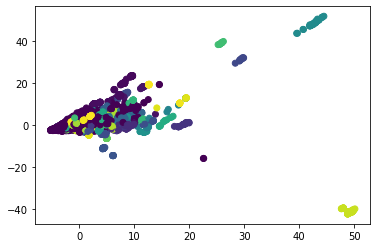

In [329]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_pred_db)

In [342]:
agc = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='cosine')
y_pred_agc = agc.fit_predict(X_scaled)
# plt.scatter(X_new[:,0], X_new[:,1], y_pred_agc)

In [352]:
data_copy = data.copy()
data_copy['pred_label'] = y_pred_agc

In [344]:
np.unique(y_pred_agc)

array([0, 1, 2])

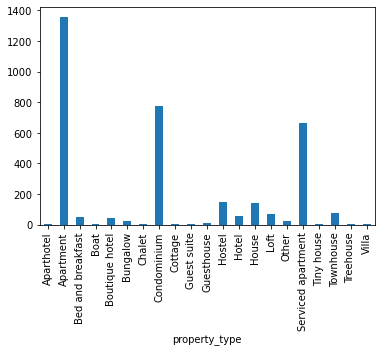

In [359]:
data_copy[data_copy['pred_label']==0].groupby('property_type').size().plot(kind='bar')

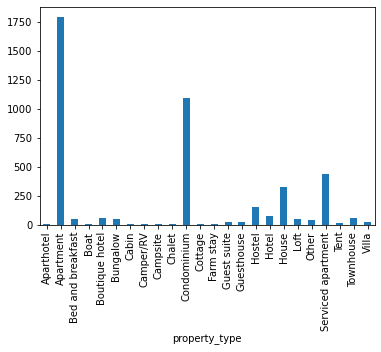

In [361]:
data_copy[data_copy['pred_label']==1].groupby('property_type').size().plot(kind='bar')

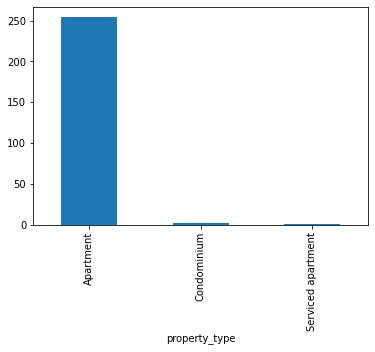

In [362]:
data_copy[data_copy['pred_label']==2].groupby('property_type').size().plot(kind='bar')

In [366]:
data_copy[data_copy['pred_label']==0].groupby('room_type').size()

room_type
Entire home/apt    2047
Private room       1239
Shared room         172
dtype: int64

In [367]:
data_copy[data_copy['pred_label']==1].groupby('room_type').size()

room_type
Entire home/apt    1956
Private room       2055
Shared room         249
dtype: int64

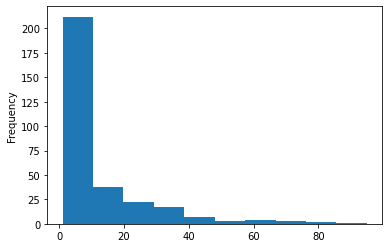

In [383]:
data_2[data_2['pred_label']==0].groupby('price').size().plot(kind='hist')

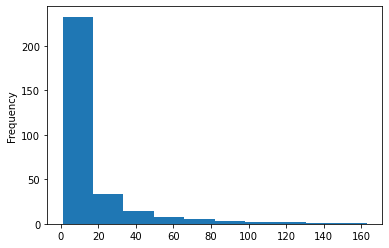

In [381]:
data_2[data_2['pred_label']==1].groupby('price').size().plot(kind='hist')

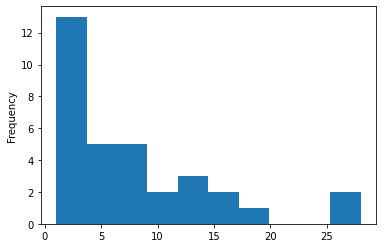

In [382]:
data_2[data_2['pred_label']==2].groupby('price').size().plot(kind='hist')

In [ ]:
# data_2[data_2['pred_label']==1].sum()

In [ ]:
data_2[data_2['pred_label']==1].sum()